In [8]:
#2 Visualization and Summaries


In [ ]:
#3 Basic use of Emcee

In [1]:
#Import stuff

import emcee
import cPickle
import scipy.optimize as op
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
#def pickle_to_file(data, fname):
#    fh = open(fname, 'w')
#    cPickle.dump(data, fh)
#    fh.close()

def pickle_from_file(fname):
    fh = open(fname, 'r')
    data = cPickle.load(fh)
    fh.close()
    return data

In [3]:
d = pickle_from_file('points_example1.pkl')
print d

{'y': array([-4.19193407, -2.40547368, -1.32244696, -1.34885689,  0.03201633,
        0.6821052 ,  1.4944546 ,  1.79548533,  3.35779705,  4.77681106]), 'x': array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ]), 'y_true': array([-3.18      , -2.59777778, -1.94444444, -1.22      , -0.42444444,
        0.44222222,  1.38      ,  2.38888889,  3.46888889,  4.62      ]), 'sigma': array([ 0.57832555,  0.56117623,  0.53944334,  0.51045361,  0.4651494 ,
        0.46649979,  0.5174734 ,  0.55456031,  0.58624953,  0.61494185])}


In [4]:
#Define likelihood, prior and posterior

def lnL(theta, x, y, yerr):
    a, b = theta
    model = b * x + a
    inv_sigma2 = 1.0/(yerr**2) 
    
    return -0.5*(np.sum((y-model)**2*inv_sigma2))


def lnprior(theta):
    a, b = theta
    if -5.0 < a < 5.0 and -10.0 < b < 10.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnL(theta, x, y, yerr)


In [5]:
def neglnL(theta, x, y, yerr):
    a, b = theta
    model = b * x + a
    inv_sigma2 = 1.0/(yerr**2)
    return 0.5*(np.sum((y-model)**2*inv_sigma2))

result = op.minimize(neglnL, [1.0, 0.0], args=(d['x'], d['y'], d['sigma']))
a_ml, b_ml = result["x"]

print result

      fun: 2.684763983581953
 hess_inv: array([[ 0.02844318,  0.00053214],
       [ 0.00053214,  0.00901792]])
      jac: array([ -2.98023224e-08,  -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.28233725,  1.31299656])


In [6]:
#3.c Setup the initial positions and run the MCMC code:

p_init = np.array([ a_ml, b_ml])

# Set up the properties of the problem.
ndim, nwalkers = 2, 100
# Setup a number of initial positions.
pos = [p_init + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
# Create the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(d['x'], d['y'],
d['sigma']))
# Run the process.
sampler.run_mcmc(pos,500)

(array([[ 0.35435126,  1.38919667],
        [ 0.40825105,  1.2381222 ],
        [ 0.5467964 ,  1.44460924],
        [ 0.18189605,  1.41342075],
        [ 0.33501704,  1.32599523],
        [ 0.32489321,  1.20775606],
        [ 0.51604272,  1.25878176],
        [ 0.46035302,  1.21941272],
        [ 0.2214619 ,  1.43749217],
        [ 0.11548189,  1.33692675],
        [ 0.06974578,  1.36027394],
        [ 0.14953884,  1.19311355],
        [ 0.26792152,  1.16885917],
        [ 0.42165952,  1.22016236],
        [ 0.30013554,  1.29989681],
        [ 0.18303566,  1.24012133],
        [ 0.22181295,  1.27997975],
        [ 0.23766113,  1.49114756],
        [ 0.04297771,  1.45199533],
        [ 0.22262567,  1.35123086],
        [ 0.44077787,  1.42757887],
        [ 0.18352166,  1.28986416],
        [ 0.07804637,  1.10562519],
        [ 0.23369605,  1.17450767],
        [ 0.32860815,  1.43479064],
        [ 0.52509585,  1.2791117 ],
        [ 0.18181612,  1.4404927 ],
        [ 0.00788028,  1.419

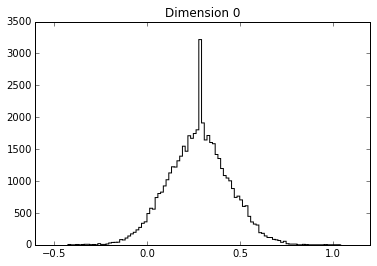

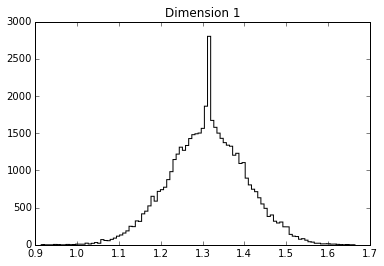

In [7]:
for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()